# Sale dataset
There is a big mall in a small city where most people go to and buy anything in the mall whatever they need. And the mall gathered some informations of to hundreds of their customers which are customers that normally subscribe the the membership card.

The mall computes spending score for each of their customer. Spending score takes values between 1 and 100.

Now the problem is that the mall would like to segment their customers into different groups but the mall has actually no idea of what this groups might be.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

sns.set_style('darkgrid')

In [2]:
# Import the data
mall = pd.read_csv('Mall_Customers.csv')

In [3]:
# Let's take a look
mall.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall = mall.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score' })

In [5]:
mall = pd.get_dummies(mall, drop_first=True)
mall

,CustomerID,Age,Annual Income,Spending Score,Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [6]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Age               200 non-null int64
Annual Income     200 non-null int64
Spending Score    200 non-null int64
Genre_Male        200 non-null uint8
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


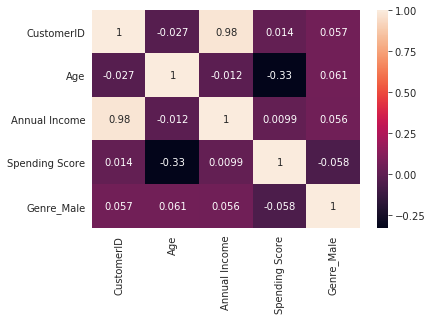

In [7]:
corr = mall.corr()
sns.heatmap(corr, annot=True)
plt.show()

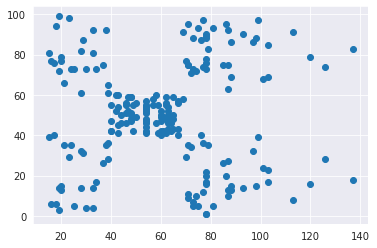

In [8]:
X = mall.iloc[:, 2:4].values
plt.scatter(X[:,0], X[:,1])
plt.show()

## Hierachical  Clustering


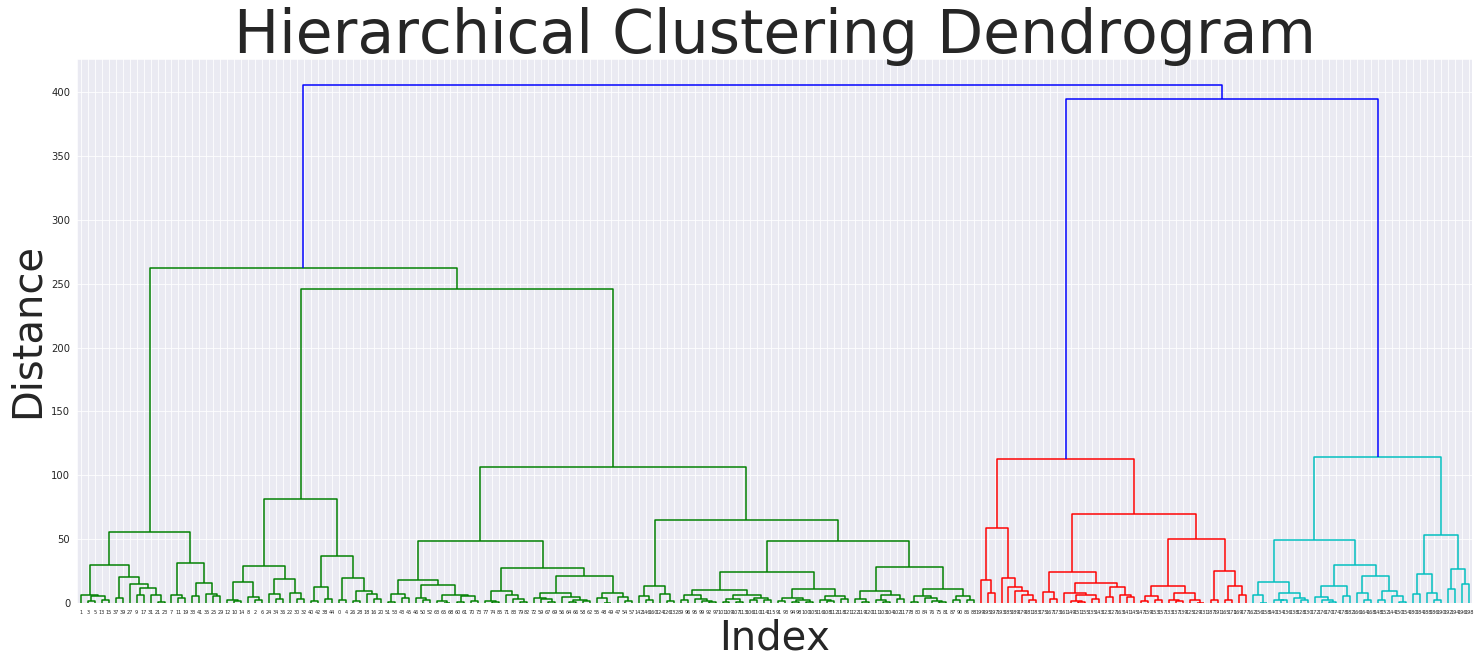

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward') 

fig = plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=60)
plt.xlabel('Index', fontsize=40)
plt.ylabel('Distance', fontsize=40)

ax = dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=5.,  # font size for the x axis labels
    labels=range(len(X)),
)
plt.show()

### Determine the number of clusters
Looking into the dendrogram, we can see that:

we can easily select a distance Cut-Off to have 5 clusters,
for more than five clusters it's getting harder since the distance between smaller groups is so close.

In [10]:
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity= 'euclidean')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Visualize the clusters
Let plot the data into a scatter plot with two dimensions Annual Income and Spending Score including colors represent the clusters.

Text(0, 0.5, 'Spending Score')

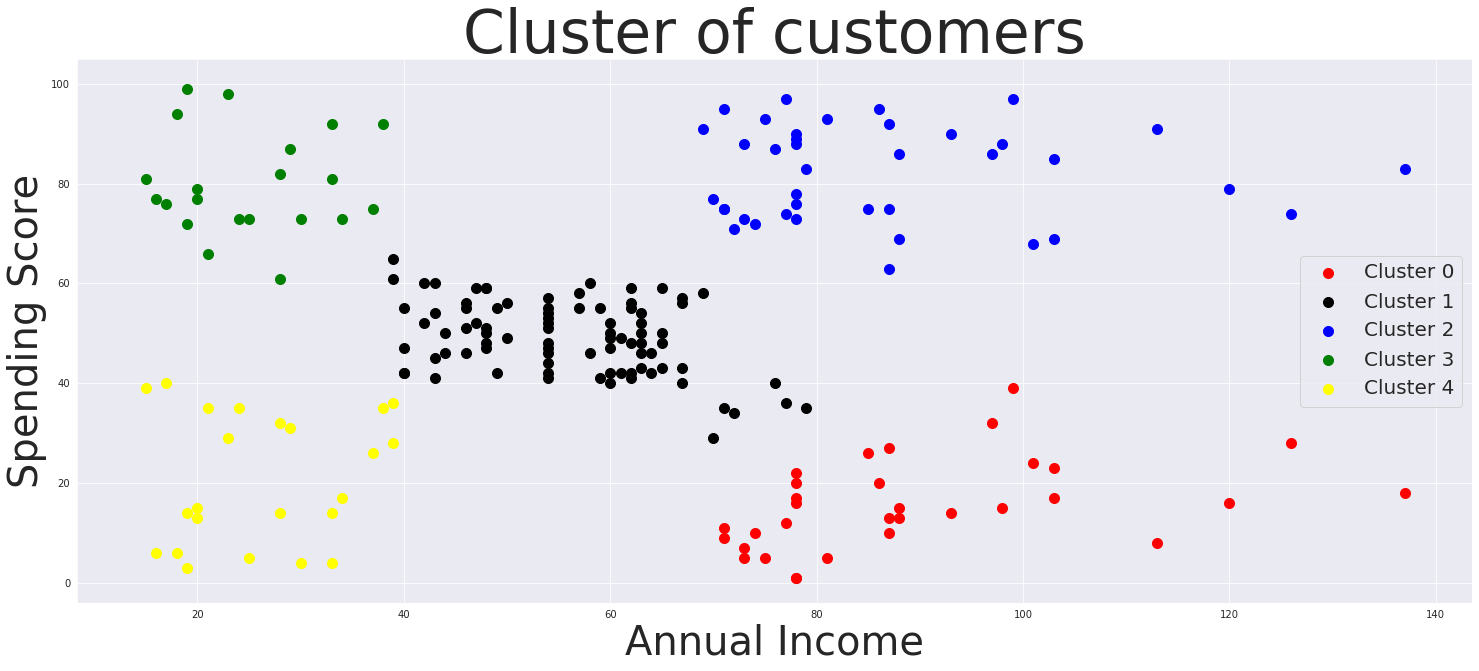

In [11]:
fig = plt.figure(figsize=(25,10))
color = ['red', 'black', 'blue', 'green', 'yellow']
for i in range(5):
    plt.scatter(X[y_hc==i][:,0], X[y_hc==i][:,1], s=100, c=color[i], label=f'Cluster {i}')
    plt.legend(fontsize=20)
plt.title("Cluster of customers", fontsize=60)
plt.xlabel('Annual Income', fontsize=40)
plt.ylabel('Spending Score', fontsize=40)

## K-Means clustering
Another method for clustering is K-Means

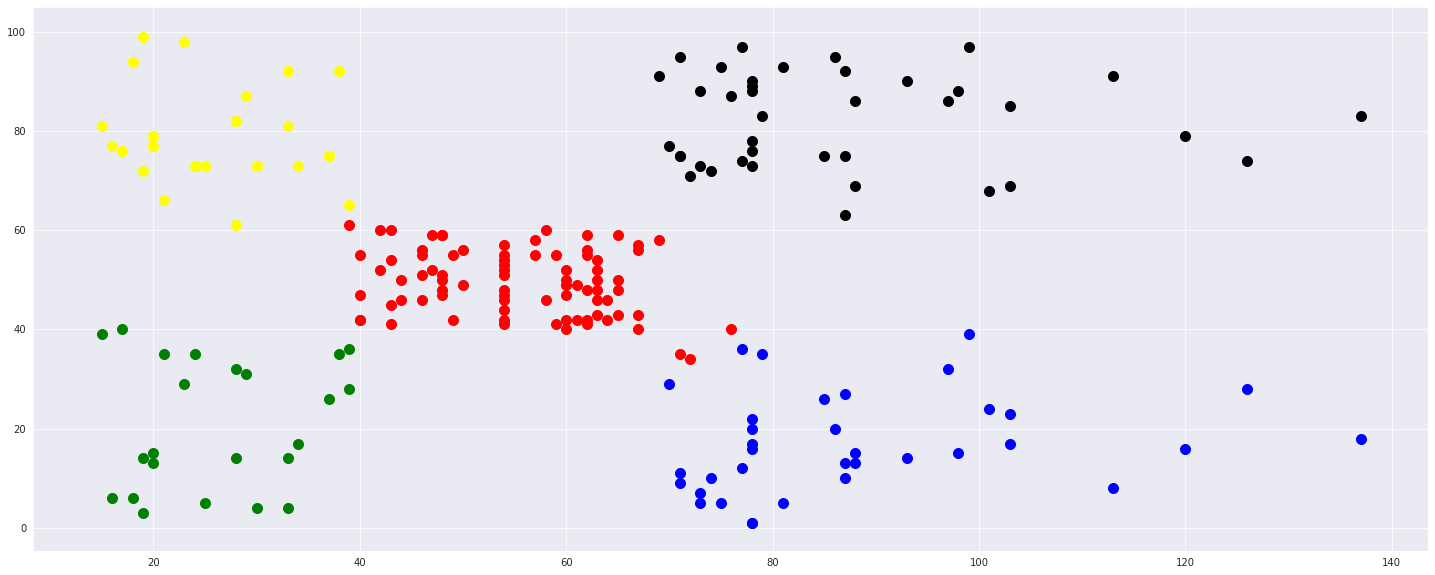

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

# PLot the result
color = ['red', 'black', 'blue', 'green', 'yellow']
plt.figure(figsize=(25,10))

for i in range(5):
    plt.scatter(X[y_kmeans==i][:,0], X[y_kmeans==i][:,1], s=100, c=color[i])

In [13]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_hc, y_kmeans))
print(y_hc, y_kmeans, sep='\n'*2)

0.0
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


# Image data

## Color-based K-Means clustering

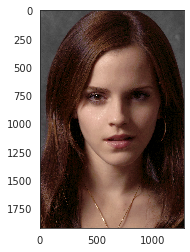

In [14]:
import matplotlib.image as mpimg
sns.set_style('white')

img = mpimg.imread('http://i.imgur.com/EnB7j4U.png')
plt.imshow(img)

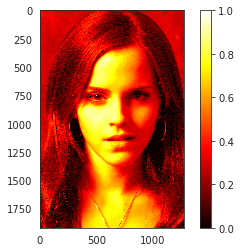

In [15]:
lum_img = img[:,:,0]
plt.imshow(lum_img, cmap='hot')
plt.colorbar()

In [16]:
from sklearn.cluster import MiniBatchKMeans
import copy

k = 2
image = copy.deepcopy(img)

In [17]:
data = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
print(data.shape)

kmeans = MiniBatchKMeans(k)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
kmeans.cluster_centers_

(2438400, 3)


array([[0.21118307, 0.13161778, 0.10570166],
       [0.6770716 , 0.5165538 , 0.44494843]], dtype=float32)

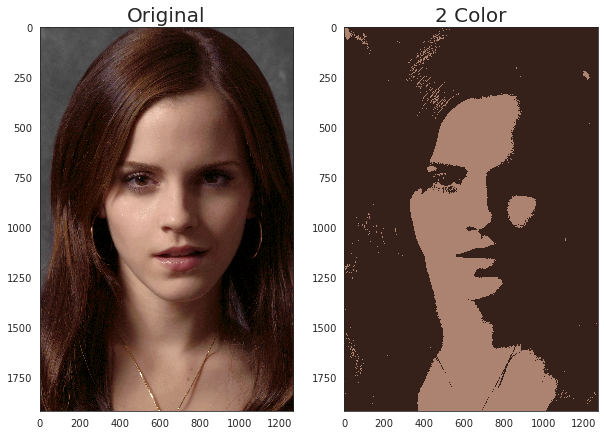

In [18]:
img_re = new_colors.reshape(image.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original', fontsize=20)
plt.subplot(1,2,2)
plt.title('2 Color', fontsize=20)
plt.imshow(img_re)

(2438400,) (2438400, 3)


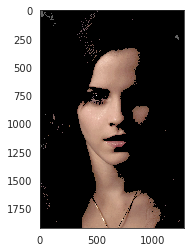

In [19]:
mask = kmeans.labels_== 0
data_filter = copy.deepcopy(data)
data_filter[mask] = [0,0,0]

image_filter = data_filter.reshape(image.shape)
plt.imshow(image_filter)
print(mask.shape, data_filter.shape)

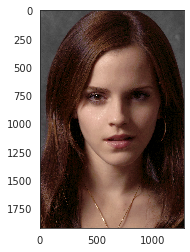

In [20]:
bug = mpimg.imread('https://i.imgur.com/IR5vgzB.png')
plt.imshow(img)


(375, 500, 4)


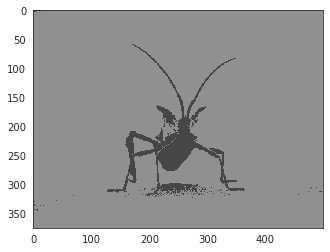

In [21]:
re = bug.reshape(-1,4)
print(bug.shape)
kmeans.fit(re)
new_bug = kmeans.cluster_centers_[kmeans.predict(re)]
new_bug = new_bug.reshape((bug.shape))
plt.imshow(new_bug)


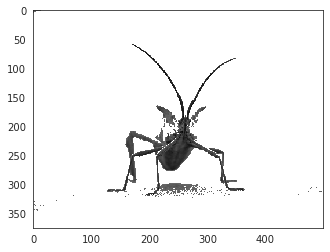

In [22]:
bug_mask = kmeans.labels_ == 1
bug_mask.shape

bug_filter = copy.deepcopy(re)
bug_filter[~bug_mask] = [1,1,1,1]
bug_filter = bug_filter.reshape(bug.shape)
plt.imshow(bug_filter)

## Principal Component Analysis


In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
a = np.unique(digits.target)
print(digits.data.shape, digits.target[:], a, sep='\n')

(1797, 64)
[0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)

print(pca.components_)
print(pca.explained_variance_)

[[-1.81394975e-17 -1.73094478e-02 -2.23428735e-01 -1.35913396e-01
  -3.30323599e-02 -9.66341714e-02 -8.32953469e-03  2.26898103e-03
  -3.20515591e-04 -1.19308810e-01 -2.44451677e-01  1.48512538e-01
  -4.67320184e-02 -2.17740780e-01 -1.48137406e-02  4.47778668e-03
  -4.94136035e-05 -7.95418435e-02  8.33950772e-02  2.15915174e-01
  -1.72126786e-01 -1.63712015e-01  2.86444811e-02  4.23252151e-03
   9.85488252e-05  6.42319899e-02  2.54093376e-01 -3.56771841e-02
  -2.09462577e-01 -4.31310792e-02  5.13119283e-02  2.13422798e-04
  -0.00000000e+00  1.59950964e-01  3.68690891e-01  1.64406926e-01
   8.52008469e-02  3.72981510e-02  2.15866311e-02 -0.00000000e+00
   1.28865659e-03  1.06945330e-01  3.03067490e-01  2.47813012e-01
   2.09637424e-01  1.22324755e-02 -3.69459878e-02  1.61484599e-03
   6.93023148e-04 -8.35142651e-03 -5.58598930e-02  9.30531458e-02
   1.07387768e-01 -1.37734522e-01 -6.32879965e-02  9.61668262e-04
   9.55075096e-06 -1.40786696e-02 -2.35675400e-01 -1.41225695e-01
  -9.15955

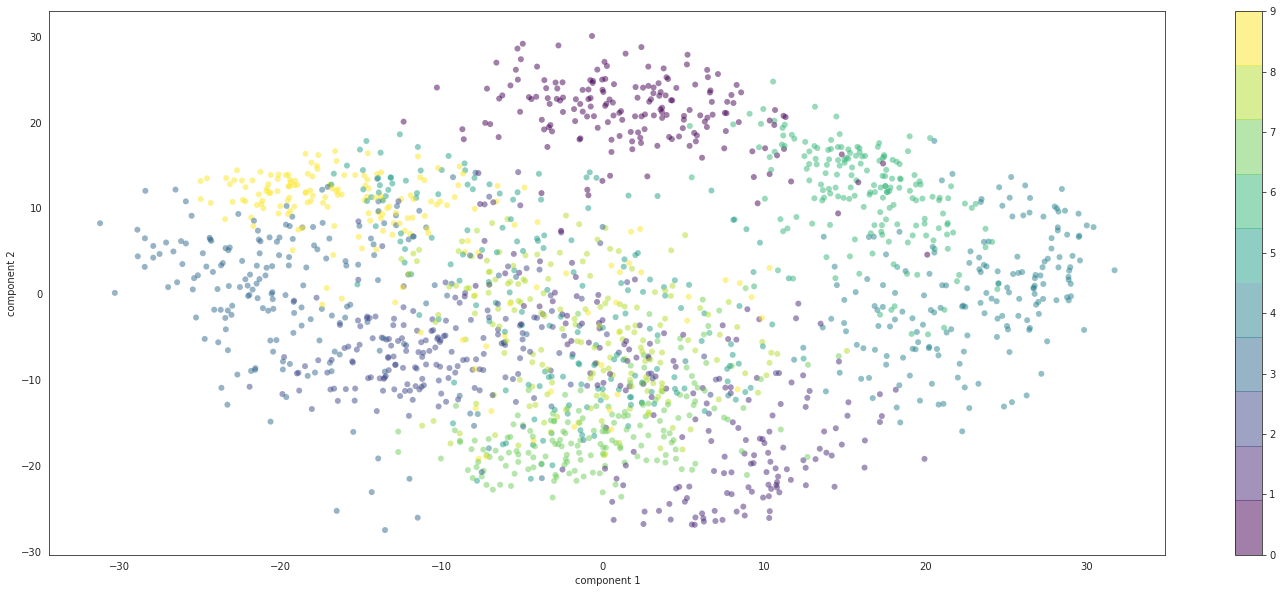

In [40]:
projected = pca.fit_transform(digits.data)

plt.figure(figsize=(25,10))

plt.scatter(projected[:,0], projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('viridis', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

## Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

Text(0, 0.5, 'cumulative explained variance')

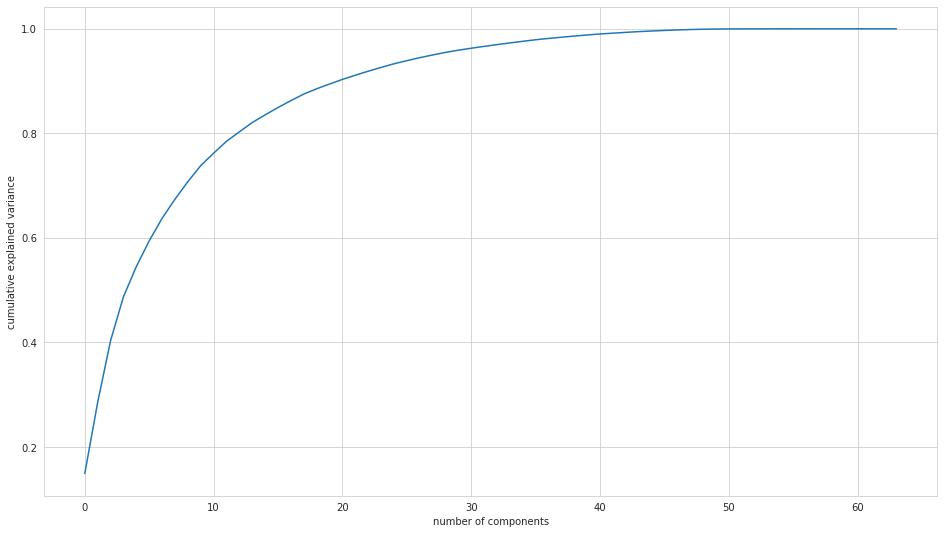

In [43]:
sns.set_style('whitegrid')

pca = PCA().fit(digits.data)
plt.figure(figsize=(16,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This curve quantifies how much of the total, 64-dimensional variance is contained within the first  N  components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering
PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.



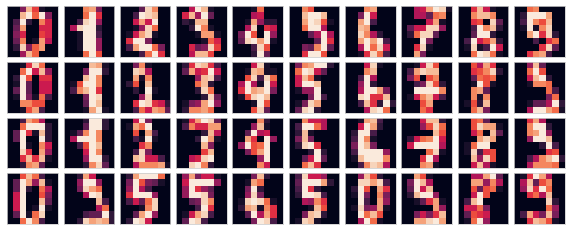

In [44]:
def plot_images(data, height=8, width=8):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(height, width))
plot_images(digits.data)

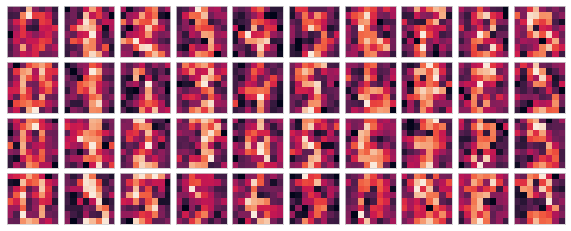

In [53]:
np.random.seed(2)
noisy = np.random.normal(digits.data, 4)
plot_images(noisy)

In [54]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

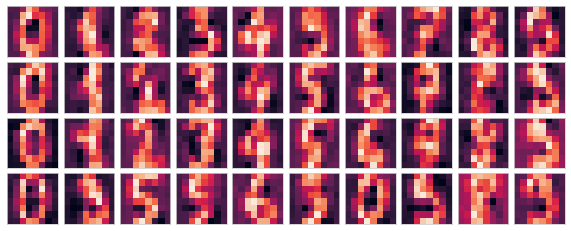

In [57]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_images(filtered)

## PCA Example: Eigenfaces
We are using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [58]:
from sklearn.datasets import fetch_lfw_people
aces = fetch_lfw_people(min_faces_per_person=60)


NameError: name 'faces' is not defined

In [60]:
print(aces.target_names)
print(aces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


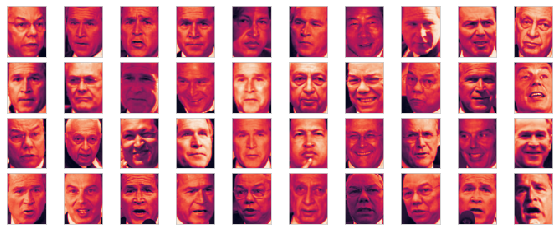

In [61]:
plot_images(aces.images, height=62, width=47)

In [62]:
pca =PCA().fit(aces.data)

Text(0, 0.5, 'variance')

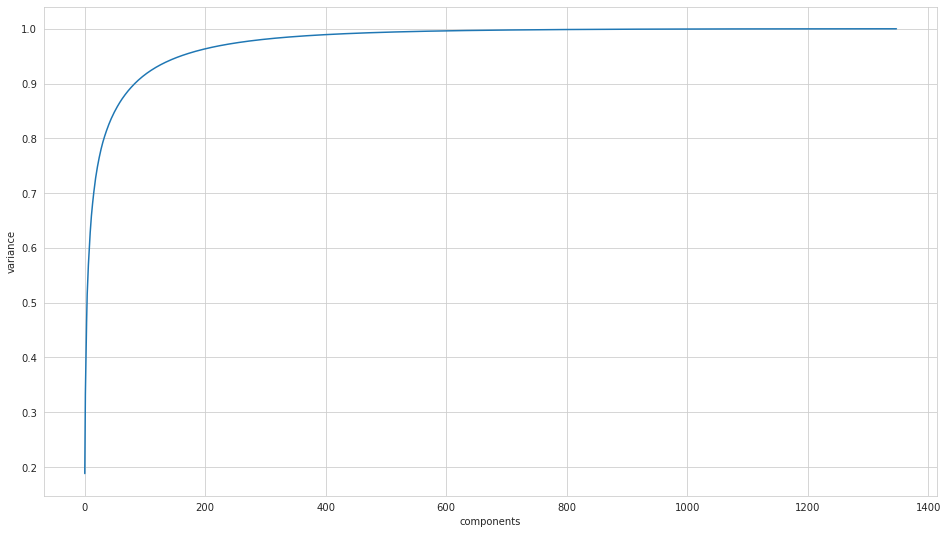

In [64]:
plt.figure(figsize=(16,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('variance')

We see that these 200 components account for just over 95% of the variance. That would lead us to believe that using these 200 components, we would recover most of the essential characteristics of the data.

In [75]:
a = np.sqrt(2914)
62 * 47

2914

In [74]:
k = 200
new_pca = PCA(n_components=k)
new_pca.fit(aces.data)
com = new_pca.transform(aces.data)
new = new_pca.inverse_transform(com)


(1348, 2914)


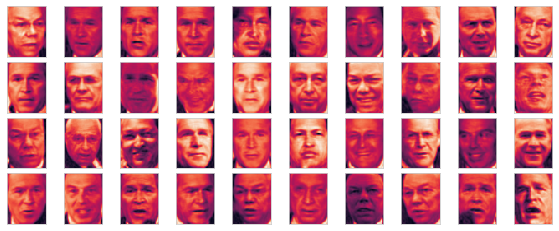

In [76]:
print(new.shape)
plot_images(new, height=62, width=47)
plt.show()

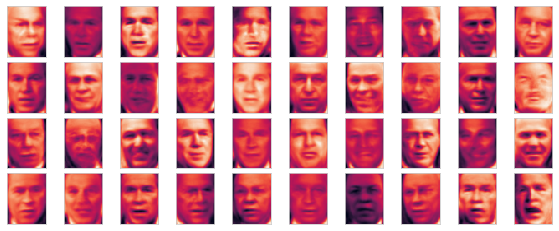

In [80]:
k = 50
new_pca = PCA(n_components=k)
new_pca.fit(aces.data)
com = new_pca.transform(aces.data)
new = new_pca.inverse_transform(com)
plot_images(new, height=62, width=47)
plt.show()